In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [6]:
# Define Input and Output Variables
pm25 = ctrl.Antecedent(np.arange(0, 151, 1), 'pm25')             # PM2.5 in μg/m³
ozone = ctrl.Antecedent(np.arange(0, 101, 1), 'ozone')           # O3 in ppb
wind_speed = ctrl.Antecedent(np.arange(0, 51, 1), 'wind_speed')  # Wind speed in km/h
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')     # Relative humidity in %

health_risk = ctrl.Consequent(np.arange(0, 101, 1), 'health_risk')              # Risk score 0-100
recommended_action = ctrl.Consequent(np.arange(0, 4, 1), 'recommended_action')  # 0-3 scale for actions

In [7]:
# Define Membership Functions
# --- PM2.5 Levels (μg/m³) ---
pm25['low'] = fuzz.trimf(pm25.universe, [0, 0, 25])
pm25['moderate'] = fuzz.trimf(pm25.universe, [15, 35, 55])
pm25['high'] = fuzz.trimf(pm25.universe, [35, 75, 115])
pm25['very_high'] = fuzz.trapmf(pm25.universe, [75, 115, 150, 150])

# --- Ozone Levels (ppb) ---
ozone['good'] = fuzz.trimf(ozone.universe, [0, 0, 55])
ozone['moderate'] = fuzz.trimf(ozone.universe, [35, 65, 85])
ozone['unhealthy_sensitive'] = fuzz.trapmf(ozone.universe, [65, 85, 100, 100])

# --- Wind Speed (km/h) ---
wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0, 0, 10])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [5, 15, 25])
wind_speed['high'] = fuzz.trapmf(wind_speed.universe, [15, 25, 50, 50])

# --- Humidity (%) ---
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trapmf(humidity.universe, [60, 80, 100, 100])

# --- Health Risk Level (0-100) ---
health_risk['low'] = fuzz.trimf(health_risk.universe, [0, 0, 30])
health_risk['moderate'] = fuzz.trimf(health_risk.universe, [20, 45, 70])
health_risk['high'] = fuzz.trimf(health_risk.universe, [50, 75, 90])
health_risk['severe'] = fuzz.trapmf(health_risk.universe, [80, 90, 100, 100])

# --- Recommended Actions (0-3 scale) ---
recommended_action['no_action'] = fuzz.trimf(recommended_action.universe, [0, 0, 0.5])              # 0 = No Action
recommended_action['sensitive_warning'] = fuzz.trimf(recommended_action.universe, [0.5, 1, 1.5])    # 1 = Sensitive Groups Warning
recommended_action['limit_activities'] = fuzz.trimf(recommended_action.universe, [1.5, 2, 2.5])     # 2 = Limit Outdoor Activities
recommended_action['general_warning'] = fuzz.trimf(recommended_action.universe, [2.5, 3, 3])        # 3 = General Population Warning

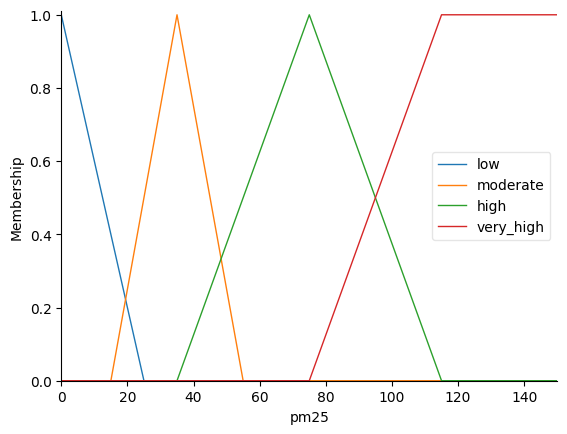

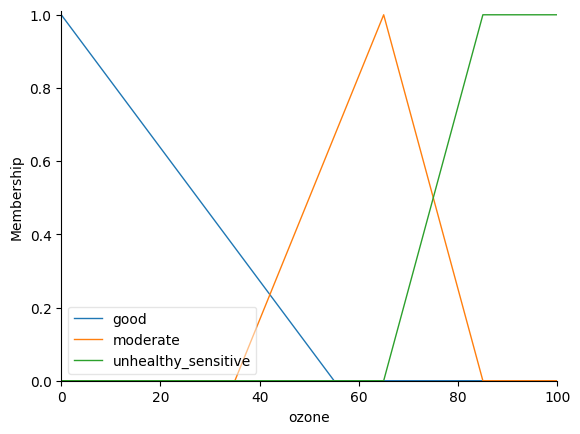

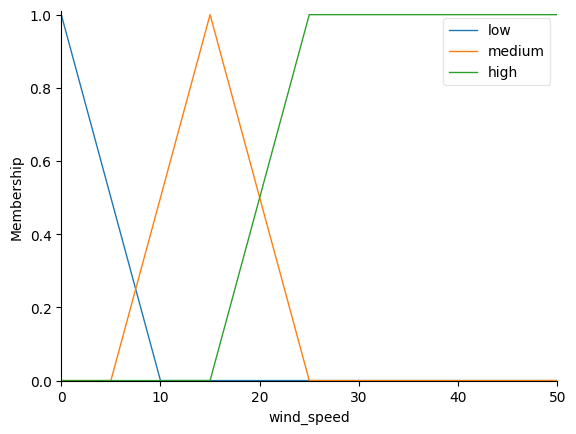

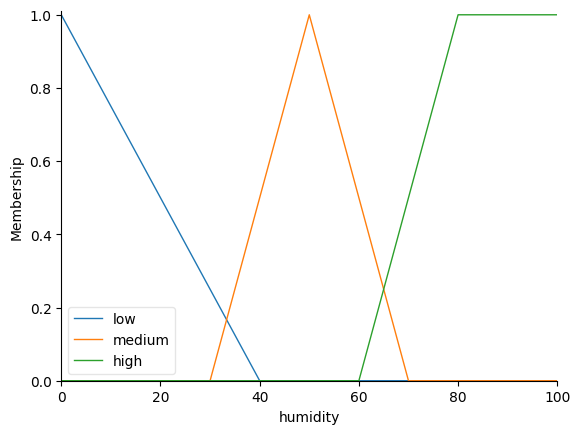

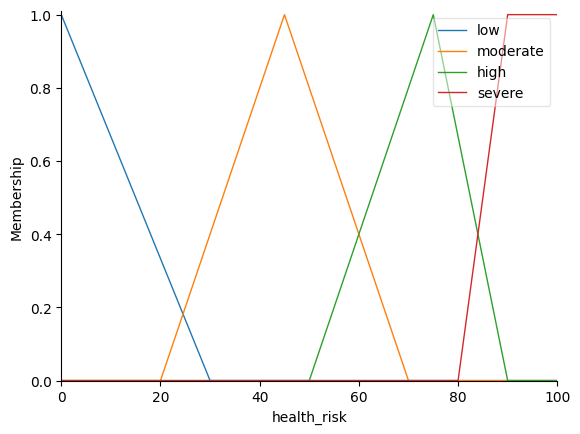

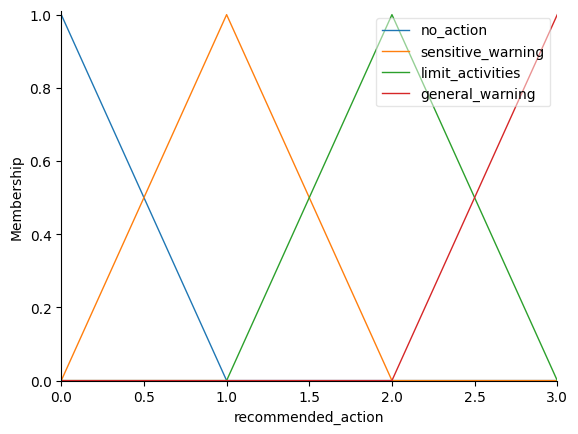

In [12]:
# Visualize Membership Functions
pm25.view()
ozone.view()
wind_speed.view()
humidity.view()
health_risk.view()
recommended_action.view()